# Kinetics and the evolution of a system

In this notebook we aim at checking the **order of a reaction** on the basis of data collected and stored in a file. 

This is going to be applied to any time-evolution of any chemical transformation.

## Rate law from the function of concentration

The goal is to calculate the order of reaction with respect to a reactant. As an example we will consider the spontaneous decomposition of oxygenated water $H_2O_2$: 

$$ 2\,H_2O_2{(aq)} \longrightarrow 2\,H_2O_{(l)} \,+\, O_2{(aq)} $$

we will first focus on the concentration of $[H_2O_2]$, that decreases as the reaction evolves.

*The speed of a chemical reaction is to be defined as the change in concentration of a substance divided by the time interval during which this change is observed.*

Our first approach will be based on this definition of the speed:


$$v = \frac{1}{V}\frac{d \,m_{H_2O_2}}{dt} = \frac{d[H_2O_2]}{dt}$$

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:

C = pd.read_csv('data_kinetics.csv')

# two series of experiments have been conducted
# C.columns # to display the descriptor of each column
C

,Time (s),C1 (mol/L),C2 (mol/L)
0,0,10.00,10.00
1,50,7.94,9.03
2,100,6.30,8.15
3,150,5.00,7.36
4,200,3.97,6.65
5,250,3.15,6.00
6,300,2.50,5.42
7,350,1.98,4.90
8,400,1.58,4.42
9,450,1.25,3.99


#### Question 1: 

In [4]:
t,x,y = np.loadtxt(fname='data_kinetics.csv',unpack=True,usecols=(0,1,2),delimiter=",",skiprows=1)

Data analysis is one of the most used techniques.

Investigate the data above: opening the file can also be done using `numpy` library even if `pandas` is the most used one. Give a precise definition of the following parameters:

- fname 
- unpack
- usecols
- delimiter
- skiprows

Answer 1:

In [5]:
# The expression of the concentration
c1 = C["C1 (mol/L)"]
C1 = np.array(c1)


# The expression of acquisition time 
# each times step is 50s from the following
t = C["Time (s)"]
t = np.array(t)

If we consider a reagent, whose concentration is $[H_2O_2]$ and called `c` in the code, and we acquire such concentrations at equally spaced times $t_i$. For $i$ ranging from `0` to `len(c)-1` the speed is:
$$ v_i = - \dfrac{[H_2O_2]_{i+1}-[H_2O_2]_i}{t_{i+1}-t_i} $$

In [6]:
# Declaration of variables:

c = C1 # Fetch c from imported table
v = np.diff(c)/50 # calculate the speed
c = np.delete(c, len(c)-1, 0) # remove the last point of c

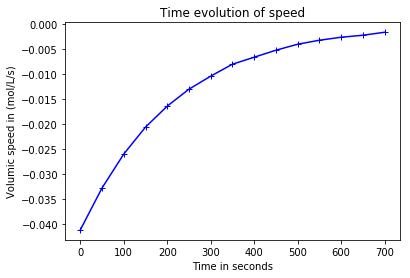

In [7]:
# Visualisation of the data
t=np.array(C["Time (s)"])
t=np.delete(t, len(t)-1, 0)# remove the last point of t
# Be careful the array t has been modified

plt.plot(t,v,marker= '+',color='blue')
plt.xlabel('Time in seconds')
plt.ylabel('Volumic speed in (mol/L/s)')
plt.title('Time evolution of speed')
plt.show()

The predicted linear model is "v = a x c + b" whose characteristics are: 
 a = -0.004123383030417634
 b = -8.313270752246388e-06


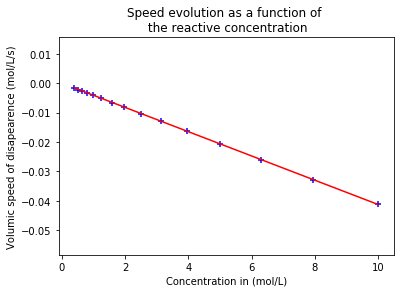

In [8]:
# Linear Regression
a, b, r, p, err = stats.linregress(c, v)
print ('The predicted linear model is "v = a x c + b" whose characteristics are: \n a = ' + str(a) + '\n b = ' + str(b))

# Figure plot of the speed and its linear predicted model 
# As a function of concentration
plt.scatter(c, v, marker = '+', color = 'blue')
plt.plot(c, a*c+b, color = 'red')

plt.xlabel('Concentration in (mol/L)')
plt.ylabel('Volumic speed of disapearence (mol/L/s)')
plt.title('Speed evolution as a function of \n the reactive concentration')
plt.show()


From this we can infer that the reaction follows a first order rate law

$$ v=k[H_2O_2] $$

with 
- $k$ being the reaction rate coefficient in $s^{-1}$
- $v$ the volumic speed of disapearance in $mol.L^{-1}.s^{-1}$
- $[H_2O_2]$ the concentration of the reactant $H_2O_2(aq)$ in $mol.L^{-1}$

___


We consider how to derive a rate law from this reaction.

$$ \dfrac{[H_2O_2]_t}{[H_2O_2]_0} = e^{-kt} $$

## The Differential Representation

Another way to calculate the reaction rate is to involve a differential equation:

$$Rate = - \dfrac{d[H_2O_2]}{dt} = k[H_2O_2]^1 = k[H_2O_2] \label{1}$$

Text(0, 0.5, 'H2O2 Concentration in mol/L')

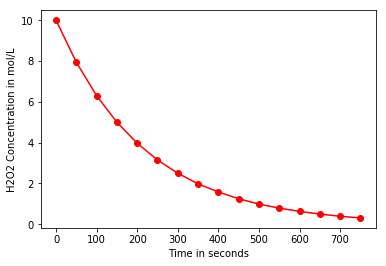

In [9]:
# Representation of the data collected 
t = C["Time (s)"]
t = np.array(t)

plt.plot(t,x,marker= 'o', color='red')

plt.xlabel("Time in seconds")
plt.ylabel("H2O2 Concentration in mol/L")

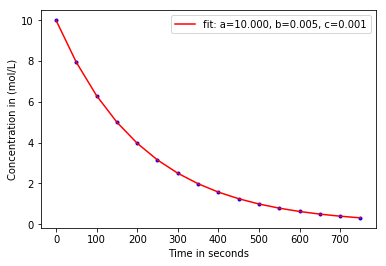

In [10]:
# Perform an curve fit

from scipy.optimize import curve_fit

def exp_func(t, a, b, c):
    return a * np.exp(-b * t) + c

time = t
cdf = x
popt, pcov = curve_fit(exp_func, t, x, bounds=(0, [10, 0.1, 1]))
plt.plot(t, x,'b.')
plt.plot(t, exp_func(t, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.ylabel('Concentration in (mol/L)')
plt.xlabel('Time in seconds')
plt.legend()
plt.show()

Note that there is a need to Constrain the optimization to the region of  $$0 \leq a \leq 10$$  $$0 \leq  b \leq 0.1$$ $$0 \leq c \leq 1$$


In [11]:
# Compare the two methods to extract the constant k

# Method 1: Getting the slope of the logarithm from the volumetric speed

c = C1 # Fetch c from imported table
v = np.diff(c)/50 # calculate the speed
c = np.delete(c, len(c)-1, 0) # remove the last point of c

a1, b, r, p, err = stats.linregress(c, v)
print(a1)

# Method 2: Fitting directly the exponential curve


a,b2,c=tuple(popt)
print(-b2) # Exponential factor

-0.004123383030417634
-0.004620963839771338


#### Question 2:

Make the same analysis for the set of data that is in column 2

Answer 2:

## Problem

On a bottle of oxygenated water $H_2O_2$, the label states: *"Hydrogen peroxide stabilised at 110 volumes, it contains approximately 30% by weight of hydrogen peroxide and is capable of releasing approximately 110 times its volume of gaseous oxygen under standard conditions of temperature (273 K) and pressure (1.013 bar)"*. Determine the concentration of $H_2O_2$ and the precise percentage by mass knowing that the density of the solution is $d=1.114$.

One liter of $H_2O_2$ produces 110 liters of molecular oxygen folowing the dismutation relation:

$$ H_2O_2{(aq)} \longrightarrow H_2O_{(l)} \,+\,\frac{1}{2} \,O_2{(aq)} $$

Calulate the number of moles of dioxygen obtained.

$$n_{O_2} = PV/RT $$

In [14]:
# Numerical application
P=1.013E5#Pascal for one atmosphere
V=110*1E-3#m3 of dioxygen gaz
R=8.314#SI perfect gas constant
T=273#Temperature in Kelvin

#Write the literal expression of the 
#number of moles ?

n_O2=0

print("The number of moles of dioxygen is {} mol".format(n_O2))

The number of moles of dioxygen is 0 mol


In [18]:
# Using the stochiometry of the reaction infer how many moles for H2O2
n_H2O2=0

In [19]:
# Using the molar mass of H2O2 we infer the mass of the n_H2O2 moles
# M_H2O2 = 34.0147 g/mol

M_H2O2 = 34.0147#g/mol

m_1_H2O2=M_H2O2*n_H2O2

In [21]:
# Give the actual mass of H2O2 and divide by the total mass of one liter of such sample given the density
# d_H2O is one kilogram per liter.

d_H2O=1#kg per Liter
d_H2O2=1.114*d_H2O#kg per Liter
m_2_H2O2=d_H2O2/d_H2O*1#Mass in Kg

In [22]:
# What is the massic in percentage ?
m_1_H2O2/m_2_H2O2*100

0.0

#### Questions 3:

Commercial oxygenated water is **10 Vol** considering the same resolution give the percentage which is expected.

**Answer:**

____

In [1]:
M=166.0028# g/mol

In [2]:
V=0.1# L

In [3]:
M/V

1660.028

In [6]:
m=5#g
n=m/M
c=n/V
print(c)

0.30119973879958645
